# Clustering Hits: Unveiling Patterns in Spotify's Top Songs
#### COGS 118B – Final Project

# Names

- Sidney Ma
- Regan Yang
- Noah Poremba
- Andrew Pan

# Abstract 
This project focuses on cluster analysis of songs based on the Spotify API’s audio feature measurements. We have collected 2,400 popular songs from the past two decades, with various audio features extracted from each song, such as tempo, energy, and valence. With this data, we will utilize a variety of machine learning algorithms to perform cluster analysis, with the end goal of categorizing songs based only on their audio features. If we determine that the songs do cluster based on these measurements, we will run several metrics to evaluate the model’s success. Afterward, we hope to interpret the clusters, and determine whether or not they resemble typical genre classifications. By uncovering the patterns and structures behind widely known music, this analysis seeks to enhance our understanding of music preferences, and hopefully contribute to improved music classification algorithms.

# Background

Songs can have a variety of subjective qualities, but they typically group together into common categories, hence the existence of music genres. However, it’s difficult to quantify these categories, as it’s not clear what features of a song actually constitute them. The Spotify API offers a solution to this: for every song, it includes measurements of various audio features, such as tempo, energy, and danceability (1). It has already been shown that these audio features can be used to predict a song’s genre with some success. Data scientist Tarak Ram uses Keras, a Neural Network library, to train an NN model to try and predict song genres. With Keras, Ram was able to achieve 88% accuracy in classifying Spotify music genres, a surprisingly good result (2).  However, it is not clear whether or not these audio feature measurements tend to cluster together on their own, without the aid of genre labels (i.e. using unsupervised models). Additionally, even if they do cluster into discrete groups, we do not know whether these groups would resemble typical genres (e.g. pop, hip-hop, rock), or if they would line up with some other way of classifying music (4).
As such, we are interested in determining how popular music tends to group together based only on its audio feature measurements, without the influence of genre labels.


# Problem Statement

We aim to uncover underlying patterns and structures within popular music by analyzing a comprehensive set of audio features. Our objective is to systematically examine numerical measurements and ratings associated with top songs, including attributes such as duration, tempo, energy, and others. We intend to observe how these songs cluster together based on these properties, using unsupervised learning techniques that are measurable, discussed in the next couple paragraphs. 

In terms of replicability, this study is designed to be replicable through the use of standardized data collection methods and analysis procedures. We used publicly available datasets containing audio features and song ratings, ensuring that our analyses can be replicated by other researchers using the same or similar datasets. Additionally, the unsupervised machine learning algorithms employed, including dimensionality reduction techniques and clustering methods. For dimensionality reduction techniques, we are utilizing Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE), and Uniform Manifold Approximation and Projection (UMAP). For the latter two, we use `random_state=99` in for replicability purposes. In terms of clustering, we are using K-Means clustering and Gaussian Mixture Model (GMM). All of these methods are well-established and widely used in the field, further enhancing the replicability of our findings.

Our approach emphasizes quantifiable measurements and evaluations throughout the process. The audio features and song ratings under consideration are represented as numerical values, enabling precise quantification of each attribute. By applying these unsupervised machine learning algorithms, we aim to quantify the degree of similarity or dissimilarity between songs based on their feature profiles. Furthermore, we are incorporating evaluation metrics including silhouette scores and the Elbow Method to quantitatively assess the effectiveness of the clustering solutions generated by the algorithms.

# Data

For our project, we'll examine the Billboard Year-End Hot 100 songs spanning from 2000 to 2023. In this current dataset, there are 2,400 songs and 22 variables, including basic info about the artist, album, and release date, as well as Spotify audio features like liveness, valence, and tempo. The dataset can be found [here](https://raw.githubusercontent.com/pandrew99/MindfulML/main/bb_full.csv) (5). Specifics about the audio features can be found on the Spotify API website linked [here](https://developer.spotify.com/documentation/web-api/reference/get-audio-features) (6), and all of the features are described as follows:
- `title`: The song name of a song. 
- `artist`: The person who sang the song.
- `album`: The album that the song is a part of.  
- `release_date`: When the song was released to the public, in year/month/day notation. 
- `popularity`: The ranking of a song for that particular year, from 1 to 100. 
- `duration_ms`: How long the song is, in milliseconds.
- `explicit`: A bool value saying whether a song is classified as “explicit” or not
- `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- `energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- `key`: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- `loudness`: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- `mode`: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- `speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- `acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- `instrumentalness`: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- `liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- `valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- `tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- `time_signature`: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
- `type`: The object type. Allowed values: "audio_features"
- `gender`: The gender of the artist. 
- `genre`: the type of music of the song, including “Country”, “Pop”, etc. 

Our data preparation process is as follows:
1. Select numerical columns
2. Reformat all cells as floats
3. Save song info (titles, genres, and rankings) for later analysis
4. Normalize columns

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm

# Ignore warnings
import sys
original_stderr = sys.stderr
sys.stderr = open('/dev/null', 'w')

We plan to use all audio features in our analysis except for:
- Key: This is a categorical feature, and the numbers 1-12 do not have any significance.
- Time signature: Almost all songs are in 4/4 time, and many songs are incorrectly marked as 5/4.
- Instrumentalness: The values for this feature are almost all zero.

In [2]:
bb_full = pd.read_csv("bb_full.csv")

# Select numerical columns
numerical_cols = ["duration_ms", "explicit", "danceability", 'energy',
                  'loudness', 'mode', 'speechiness', 'acousticness',
                  'liveness', 'valence', 'tempo']
bb_num = bb_full[numerical_cols]

# Save song info for later
song_info = bb_full[["title", "genre", "ranking"]]

# Set all cells to floats
bool_cols = bb_num.select_dtypes(include=['bool']).columns
int64_cols = bb_num.select_dtypes(include=['int64']).columns
bb_num[bool_cols] = bb_num[bool_cols].astype(np.float64)
bb_num[int64_cols] = bb_num[int64_cols].astype(np.float64)

bb_num

,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo
0,250546.0,0.0,0.529,0.496,-9.007,1.0,0.0290,0.1730,0.2510,0.278,136.859
1,294986.0,0.0,0.609,0.923,-3.908,1.0,0.0338,0.1600,0.2950,0.961,115.996
2,261973.0,0.0,0.777,0.601,-5.931,1.0,0.1260,0.0406,0.0348,0.680,97.911
3,296693.0,0.0,0.725,0.487,-5.959,0.0,0.0368,0.2600,0.4310,0.599,136.086
4,257066.0,0.0,0.636,0.761,-6.389,0.0,0.0306,0.0517,0.0642,0.736,93.896
...,...,...,...,...,...,...,...,...,...,...,...
2395,214945.0,0.0,0.778,0.632,-5.600,0.0,0.0493,0.2740,0.0915,0.498,122.104
2396,246133.0,1.0,0.557,0.774,-5.275,0.0,0.3510,0.0120,0.3960,0.397,111.975
2397,185748.0,1.0,0.849,0.614,-7.323,1.0,0.3170,0.0282,0.0603,0.472,111.363
2398,244760.0,0.0,0.591,0.637,-6.365,0.0,0.0300,0.0107,0.1130,0.432,99.998


We use two normalization techniques: min/max normalization and logistic normalization. Both of these will keep the audio features between 0 and 1 (as most of the measurements start that way), and logistic normalization will be useful for any right-skewed features.

In [3]:
from sklearn.preprocessing import MinMaxScaler

def min_max_norm(df, column):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[column].values.reshape(-1, 1))
    return scaled_data.flatten() 

def logistic_norm(df, column):
    # Handle zeros
    min_nonzero = df[df[column] > 0][column].min() / 2 if (df[column] == 0).any() else 0
    transformed_data = 1 / (1 + np.exp(- (df[column] + min_nonzero)))
    
    return transformed_data

In [4]:
# Apply normalizations to all columns
bb = bb_num.copy()
bb["duration_ms"] = min_max_norm(bb_num, "duration_ms")
bb["loudness"] = min_max_norm(bb_num, "loudness")
bb["tempo"] = min_max_norm(bb_num, "tempo")
bb["speechiness"] = logistic_norm(bb_num, "speechiness")
bb["acousticness"] = logistic_norm(bb_num, "acousticness")
bb["liveness"] = logistic_norm(bb_num, "liveness")
bb

,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo
0,0.322247,0.0,0.529,0.496,0.536935,1.0,0.507249,0.543142,0.562423,0.278,0.536061
1,0.405339,0.0,0.609,0.923,0.838991,1.0,0.508449,0.539915,0.573220,0.961,0.405322
2,0.343613,0.0,0.777,0.601,0.719152,1.0,0.531458,0.510149,0.508699,0.680,0.291991
3,0.408531,0.0,0.725,0.487,0.717493,0.0,0.509199,0.564636,0.606112,0.599,0.531217
4,0.334438,0.0,0.636,0.761,0.692021,0.0,0.507649,0.512922,0.516044,0.736,0.266830
...,...,...,...,...,...,...,...,...,...,...,...
2395,0.255681,0.0,0.778,0.632,0.738760,0.0,0.512323,0.568075,0.522859,0.498,0.443598
2396,0.313996,1.0,0.557,0.774,0.758012,0.0,0.586860,0.503000,0.597726,0.397,0.380124
2397,0.201090,1.0,0.849,0.614,0.636692,1.0,0.578593,0.507050,0.515070,0.472,0.376289
2398,0.311428,0.0,0.591,0.637,0.693442,0.0,0.507499,0.502675,0.528220,0.432,0.305069


The above dataset is the one we will use for dimensionality reduction and clustering.

# Proposed Solution

With our min-max normalized data from above utilizing several columns with float-based data, we are incorporating several dimensionality reductions and clustering algorithms. Our goal is to cluster the songs into the different genres, using the features as described above. Our pipeline includes first reducing the dimensionality of our data using PCA, t-SNE, and the UMAP algorithms. We decided to do dimensionality reduction since our dataset includes 10 columns/features, and we wanted to reduce it to 2 dimensions to try to keep as much of the important information (the signal) of our dataset and make the models more computationally efficient to run – which is important especially with larger and larger datasets. The reason why we decided to use PCA is because of its linear properties, ease of use, and fast computation. Moreover, t-SNE and UMAP are used because of their nonlinear techniques and their effective visualization of high-d data into low-d. 

Subsequently, we will use K-Means and GMM on our dimensionality-reduced data in order to better cluster the data. Although PCA, t-SNE and UMAP can naturally cluster the data, there’s no guarantee that they’ll do it well. If our clustering is more spherical, K-Means is a great choice for that, and if the clusters are varied, the probabilistic approach of GMM would be better. To determine the optimal number of clusters, we will utilize the Elbow Method and Silhouette Score. Afterwards, since we do have the genres of the songs in our original dataset, we can put the labels of the songs back on the data, and see how its performance is on the clusters. 


# Evaluation Metrics
After using the dimensionality reduction techniques of PCA, t-SNE, and UMAP, we then utilize the Silhouette Score and Elbow Method to determine the appropriate number of clusters. After incorporating these unsupervised machine learning methods, we can see how well our models generalize using the genre labels, and determine results and any conclusions we can draw from the data. 

# Results

## Dimensionality Reduction

The first part of our pipeline is to do dimensionality reduction on our data – to reduce from our 10 dimensions down to just 2, so we are able to plot it and then perform clustering in 2 dimensional space which is a lot easier computationally. We are utilizing 3 dimensionality reduction algorithms – including PCA, t-SNE, and UMAP. We will not run hyperparameter tuning for PCA, but will for t-SNE and UMAP. 

For t-SNE, we are controlling the perplexity, where we try perplexity values of [5, 20, 50, 100]. Then for UMAP, we are varying the number of neighbors, where we try out n_neighbors of [5, 10, 20, 50].

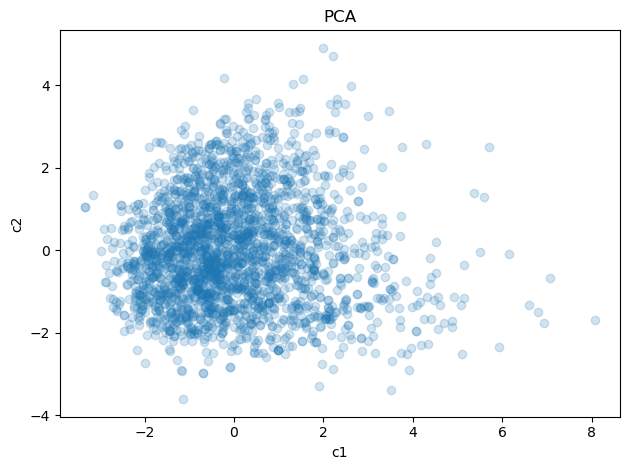

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
bb_scaled = scaler.fit_transform(bb)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(bb_scaled)
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.2)
plt.title("PCA")
plt.xlabel("c1")
plt.ylabel("c2")

plt.tight_layout()
plt.show()

It's clear from this plot that PCA does not reveal any clusters in the data. This is not surprising – given how many dimensions were involved, it's possible that the clusters were not linearly seperable, and PCA is not a good tool for clustering that kind of data. Because of this, we will not test any clustering algorithms on this PCA-reduced data.

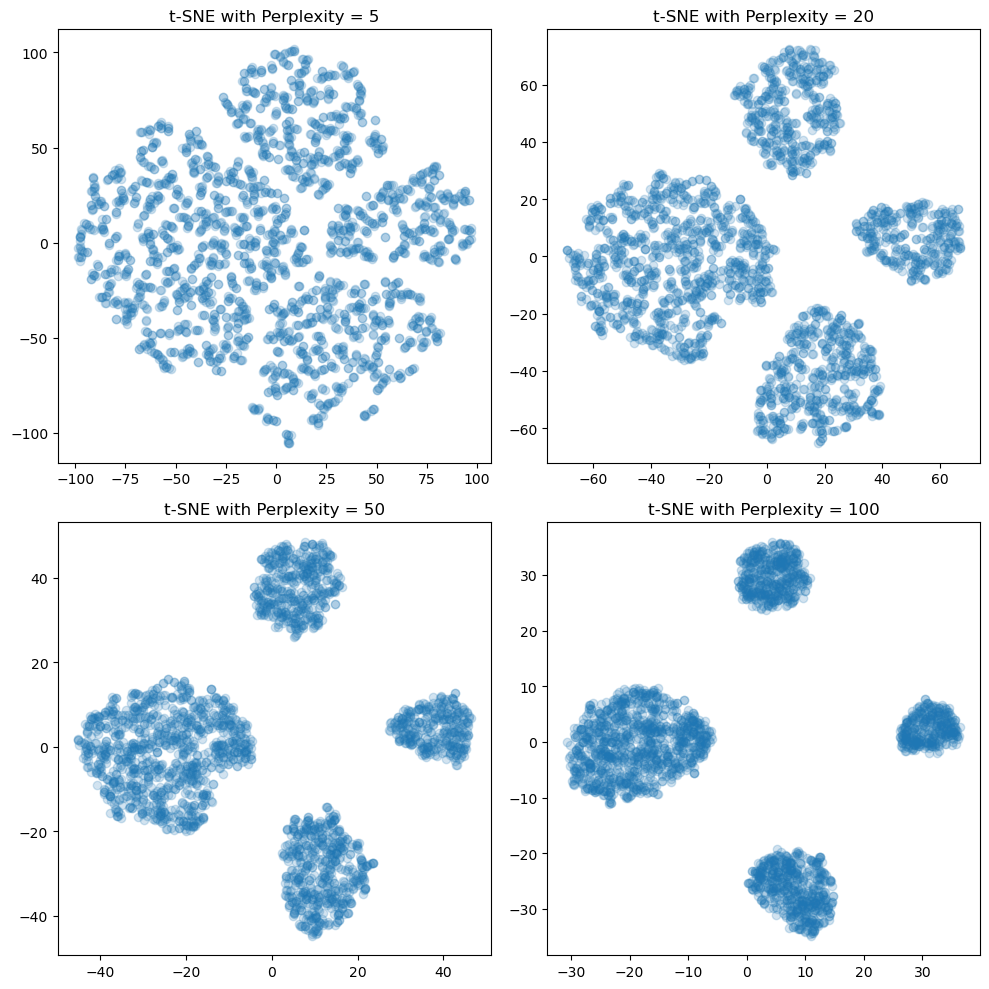

In [6]:
from sklearn.manifold import TSNE

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Test out four different perplexities
perplexities = [5, 20, 50, 100]

for ax, perplexity in tqdm(zip(axs.flat, perplexities)):
    tsne = TSNE(perplexity=perplexity, random_state=99)
    tcs = tsne.fit_transform(bb)
    ax.scatter(tcs[:, 0], tcs[:, 1], alpha=0.2)
    ax.set_title(f't-SNE with Perplexity = {perplexity}')

plt.tight_layout()
plt.show()

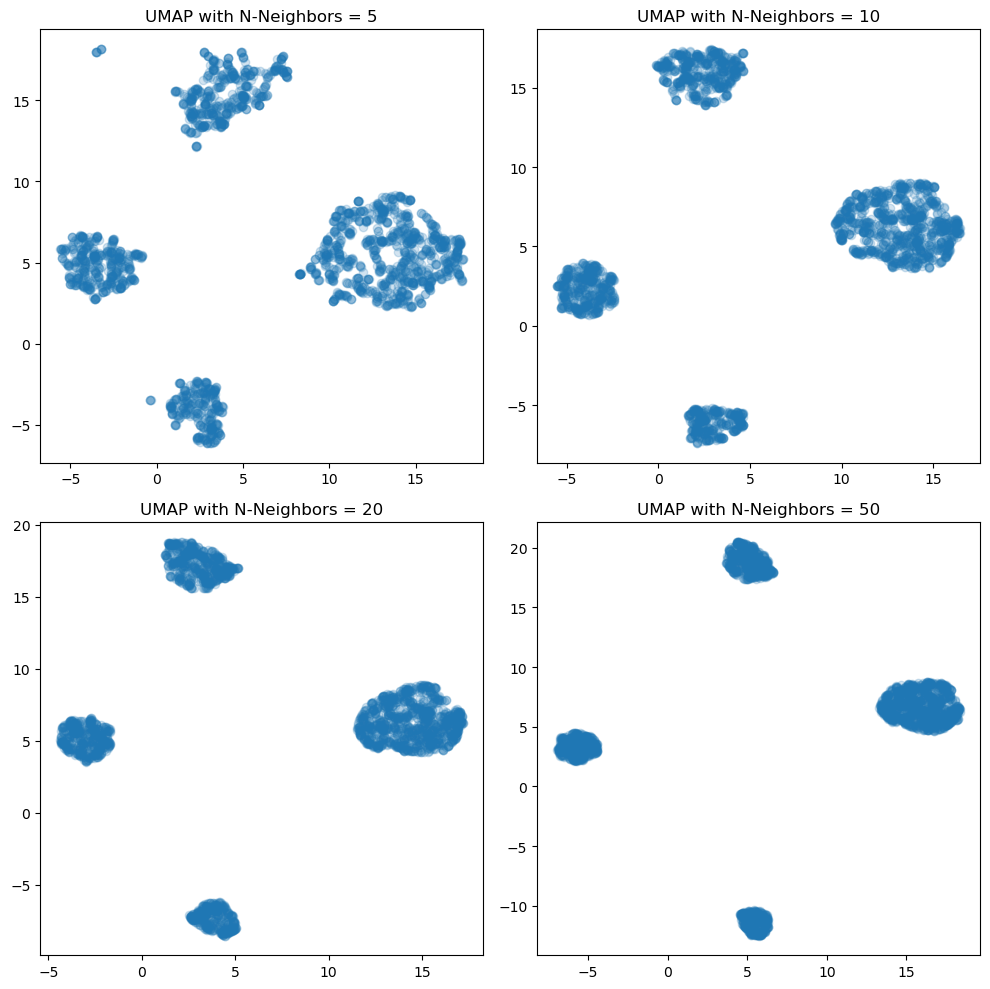

In [7]:
from umap import UMAP

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Test out four different n-neighbor settings
n_neighbors_settings = [5, 10, 20, 50]

for ax, n_neighbors in tqdm(zip(axs.flat, n_neighbors_settings)):
    umap = UMAP(n_components=2, n_neighbors=n_neighbors, random_state=99, min_dist=0.1)
    ucs = umap.fit_transform(bb)
    ax.scatter(ucs[:, 0], ucs[:, 1], alpha=0.2)
    ax.set_title(f"UMAP with N-Neighbors = {n_neighbors}")

plt.tight_layout()
plt.show()

Both t-SNE and UMAP reveal four obvious clusters at all tested hyperparameter settings. Based on these plots, we decided that the optimal setting was `perplexity=20` for t-SNE and `n_neighbors=10` for UMAP. These settings ensure that the clusters are cohesive, but excessively dense.

In [8]:
# Set models with optimal hyperparam settings

tsne = TSNE(perplexity=20, random_state=99)
tcs = tsne.fit_transform(bb)

umap = UMAP(n_components=2, n_neighbors=10, random_state=99, min_dist=0.1)
ucs = umap.fit_transform(bb)

df_pca = pd.DataFrame(df_pca)
df_tcs = pd.DataFrame(tcs)
df_ucs = pd.DataFrame(ucs)

## Clustering

We already discussed that clustering for PCA doesn’t make too much sense, so we will focus our attention on t-SNE and UMAP by using 2 clustering algorithms: K-Means and GMM. 

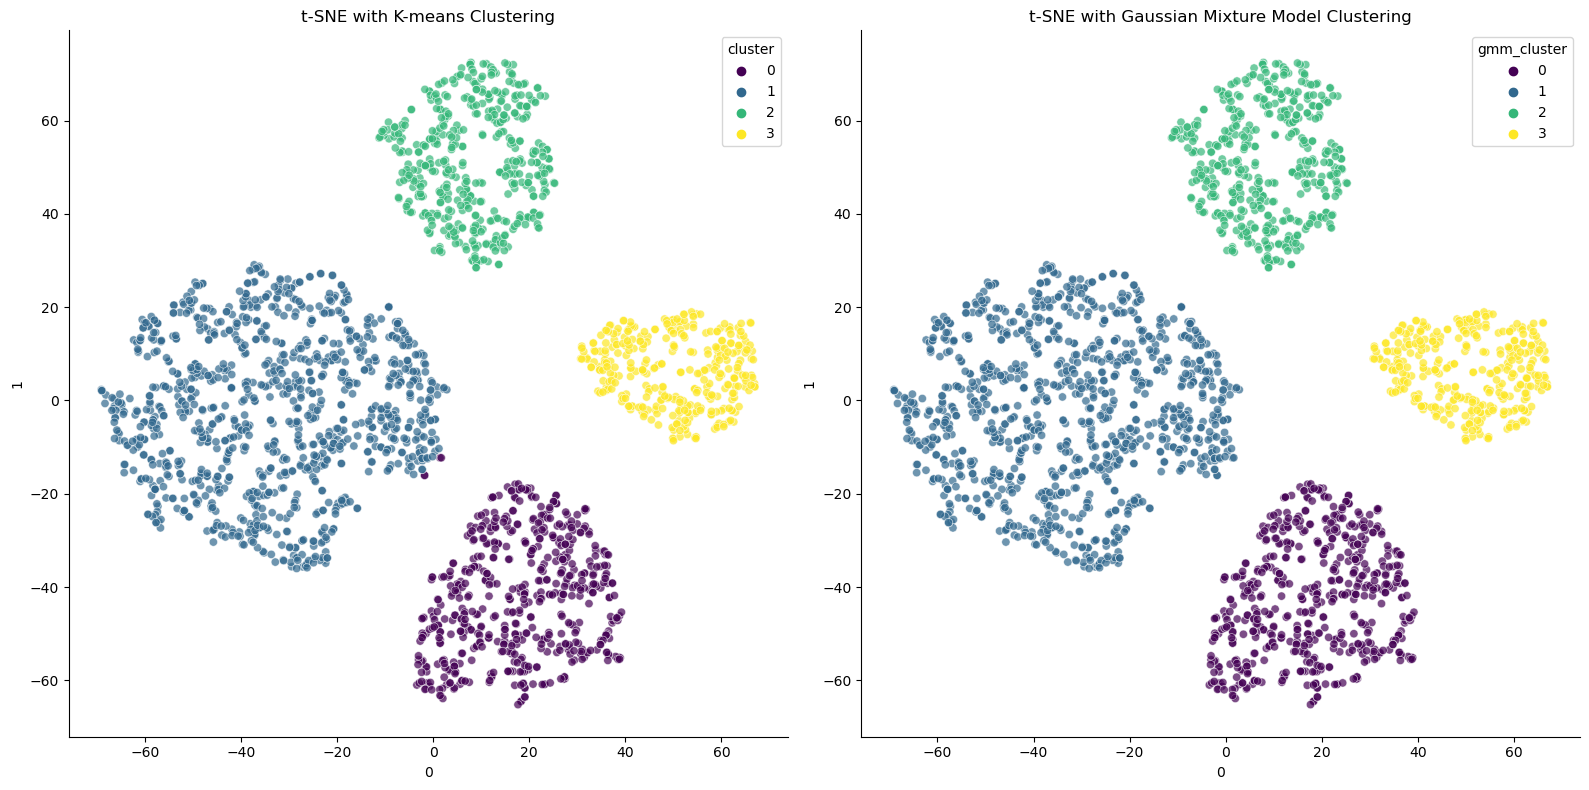

In [9]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

kmeans_tcs = KMeans(n_clusters=4, random_state=99)
df_tcs['cluster'] = kmeans_tcs.fit_predict(df_tcs[[0, 1]])

gmm_tcs = GaussianMixture(n_components=4, random_state=99)
df_tcs['gmm_cluster'] = gmm_tcs.fit_predict(df_tcs[[0, 1]])

plt.figure(figsize=(16, 8))

# Plot for KMeans
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_tcs, x=0, y=1, hue='cluster', palette='viridis', alpha=0.7)
plt.title('t-SNE with K-means Clustering')
sns.despine()

# Plot for GMM
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_tcs, x=0, y=1, hue='gmm_cluster', palette='viridis', alpha=0.7)
plt.title('t-SNE with Gaussian Mixture Model Clustering')
sns.despine()

plt.tight_layout()
plt.show()

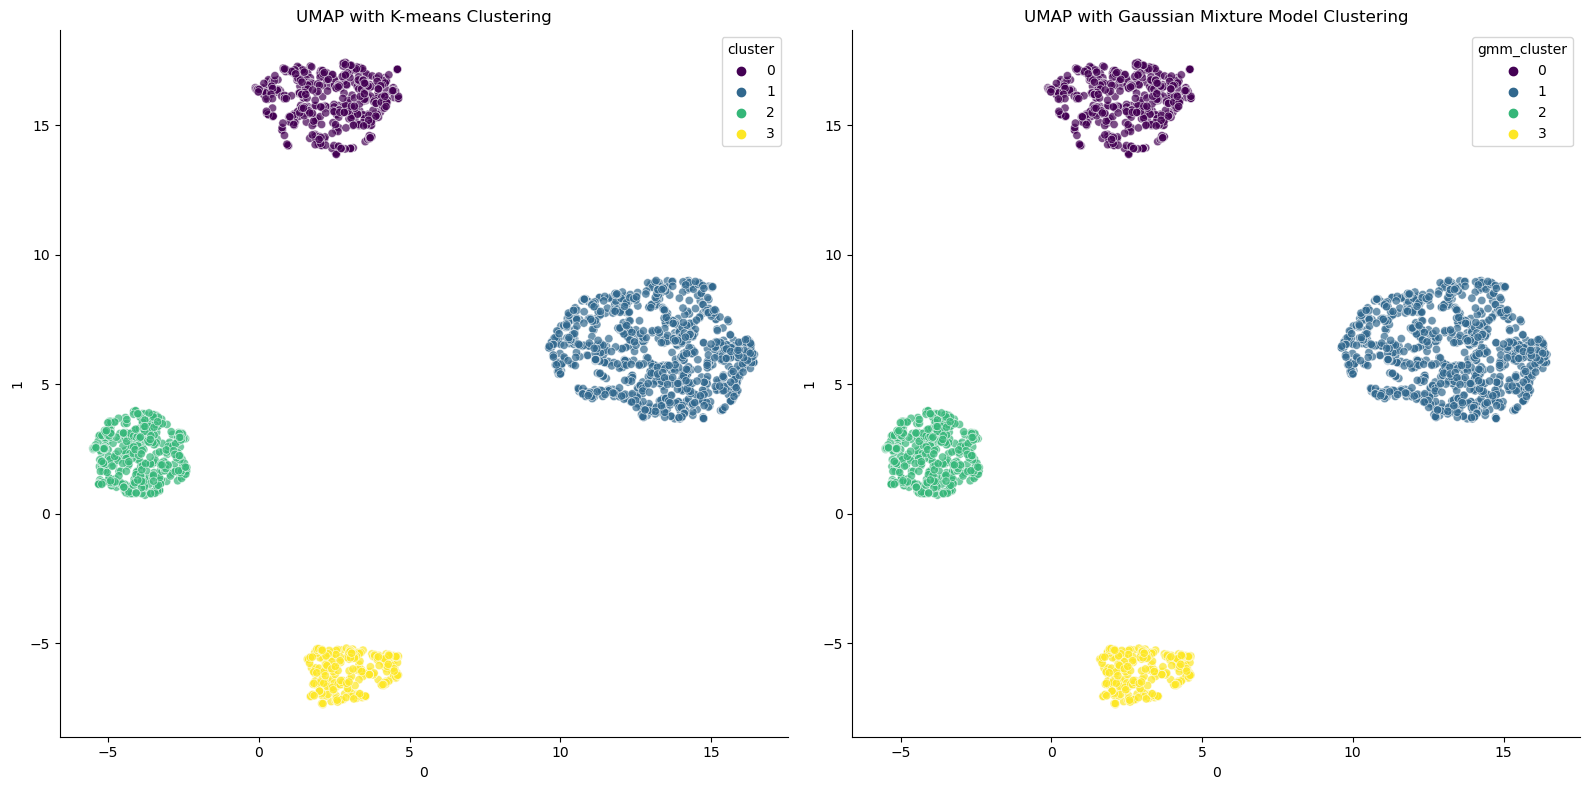

In [10]:
kmeans_ucs = KMeans(n_clusters=4, random_state=99)
df_ucs['cluster'] = kmeans_ucs.fit_predict(df_ucs[[0, 1]])

gmm_ucs = GaussianMixture(n_components=4, random_state=99)
df_ucs['gmm_cluster'] = gmm_ucs.fit_predict(df_ucs[[0, 1]])

plt.figure(figsize=(16, 8))

# Plot for KMeans
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_ucs, x=0, y=1, hue='cluster', palette='viridis', alpha=0.7)
plt.title('UMAP with K-means Clustering')
sns.despine()

# Plot for GMM
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_ucs, x=0, y=1, hue='gmm_cluster', palette='viridis', alpha=0.7)
plt.title('UMAP with Gaussian Mixture Model Clustering')
sns.despine()

plt.tight_layout()
plt.show()

## Evaluations

Evidently, both K-means and GMM techniques were completely able to identify the four clusters. Because of this, we will only continue our evaluations with K-means, the simpler method.

We are evaluating t-SNE using the Elbow method and Silhouette score for different numbers of clusters. As it turns out, the best number of clusters is four. We know this because for the elbow method, after four clusters we practically have a horizontal line. Four clusters also has the highest Silhouette score of about 0.78.

The evaluations for UMAP using the Elbow method and Silhouette score shows that four clusters is the most optimal. For the Elbow method, at four clusters the inertia line is almost horizontal. At four clusters, we have a Silhouette score of 0.9.


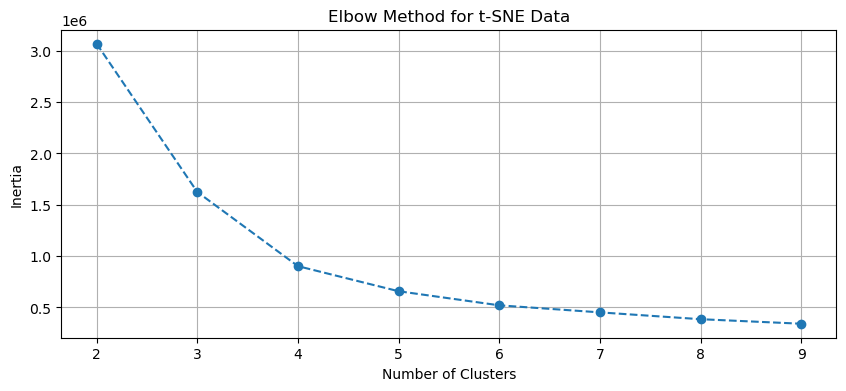

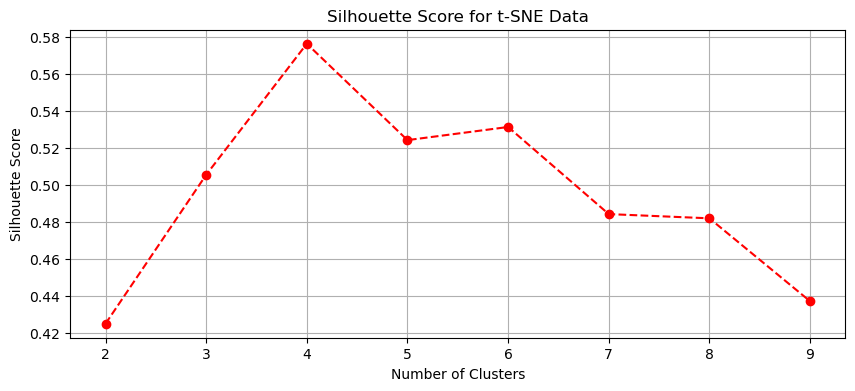

In [11]:
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
range_values = range(2, 10)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=99)
    kmeans.fit(df_tcs[[0, 1]])
    cluster_labels = kmeans.predict(df_tcs[[0, 1]])
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_tcs[[0, 1]], cluster_labels))

# Plotting the Elbow Method
plt.figure(figsize=(10, 4))
plt.plot(range_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for t-SNE Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 4))
plt.plot(range_values, silhouette_scores, marker='o', linestyle='--', color='red')
plt.title('Silhouette Score for t-SNE Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

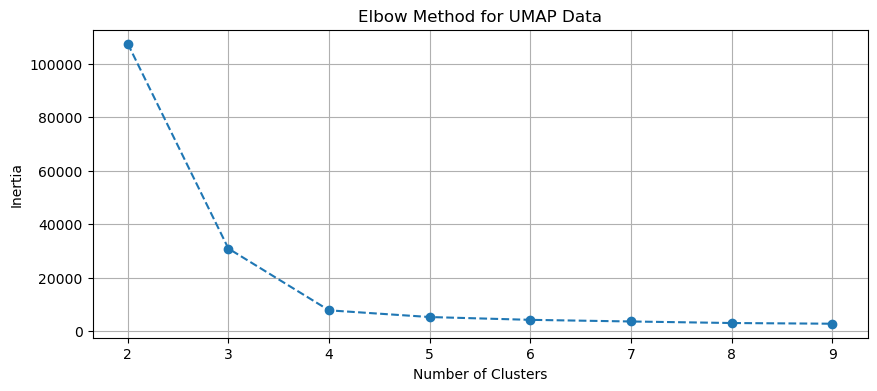

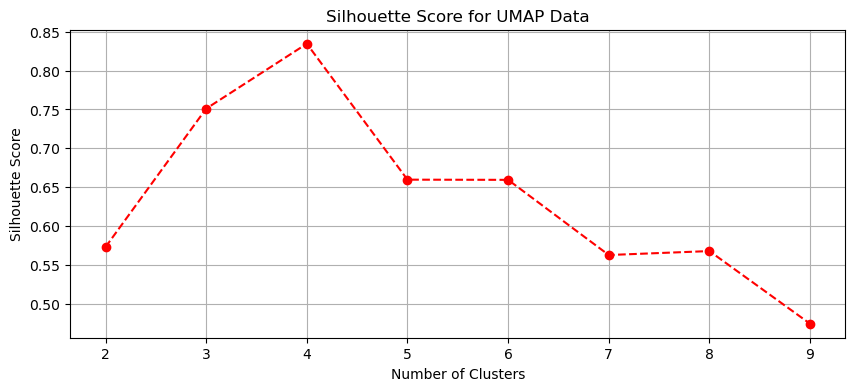

In [12]:
inertia = []
silhouette_scores = []
range_values = range(2, 10)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=99)
    kmeans.fit(df_ucs[[0, 1]])
    cluster_labels = kmeans.predict(df_ucs[[0, 1]])
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_ucs[[0, 1]], cluster_labels))

# Plotting the Elbow Method
plt.figure(figsize=(10, 4))
plt.plot(range_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for UMAP Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 4))
plt.plot(range_values, silhouette_scores, marker='o', linestyle='--', color='red')
plt.title('Silhouette Score for UMAP Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

## Comparison with true labels

Now that we have dimensionally-reduced data, we will aim to see whether or not its structure resembles true genre labels or generally reflects subjective patterns in songs. We will first collect all the dimensionally-reduced data into one dataframe, match each data point with the song titles and genre, then display them on the original plots.

In [19]:
from adjustText import adjust_text
import matplotlib.patches as mpatches

# Reset dfs to only include components
df_tcs = df_tcs[[0, 1]]
df_ucs = df_ucs[[0, 1]]

# Join all dimension-reduced datasets together
df_reduce = df_pca.merge(df_tcs, left_index=True, right_index=True, how="left").merge(df_ucs, left_index=True, right_index=True, how="left")
df_reduce.columns = ["pca_c1", "pca_c2", "tsne_c1", "tsne_c2", "umap_c1", "umap_c2"]
df_reduce

# Merge the song info
df_comparison = df_reduce.merge(song_info, left_index=True, right_index=True, how="left")
df_comparison

,pca_c1,pca_c2,tsne_c1,tsne_c2,umap_c1,umap_c2,title,genre,ranking
0,1.853309,-1.621268,-61.608719,-8.464230,10.170351,7.203145,Breathe,Country,1
1,-2.208349,-1.027655,0.781107,2.892142,15.948294,5.287613,Smooth (feat. Rob Thomas),Rock,2
2,0.114055,0.270959,-17.181152,15.089588,14.494678,4.284994,Maria Maria (feat. The Product G&B),RnB,3
3,0.462167,-0.230714,18.163563,-41.103249,2.134353,15.708334,I Wanna Know,RnB,4
4,-0.569825,-0.235550,12.586592,-26.831459,3.066084,17.146818,Everything You Want,Rock,5
...,...,...,...,...,...,...,...,...,...
2395,0.415812,0.002804,17.155968,-47.794159,1.871160,15.973946,"Shakira: Bzrp Music Sessions, Vol. 53",EDM,96
2396,-0.839321,1.749237,55.065865,5.786535,1.923352,-6.150218,MELTDOWN (feat. Drake),Hip-hop,97
2397,0.744769,2.546971,6.172820,50.979828,-3.604666,2.186536,Put It On Da Floor Again (feat. Cardi B),Hip-hop,98
2398,0.175336,-0.641696,0.207799,-48.547409,1.222661,16.992823,Bloody Mary,Pop,99


Above is the dataframe with the labels.

Next, we designed a function to label the genres and annotate the song titles of each data point on the original plots. To make sure it is readable, we only included the top 30 songs in each plot.

In [20]:
def plot_and_annotate(c1, c2):
    genres_to_include = ["Pop", "Hip-hop", "RnB", "Country", "Rock", "EDM", "Alt"]
    df = df_comparison[df_comparison["genre"].isin(genres_to_include)]
    
    color_labels = df["genre"].unique()
    num_colors = len(color_labels)
    cmap = plt.cm.get_cmap("rainbow", num_colors)
    genre_to_code = dict(zip(color_labels, range(num_colors)))
    df["color"] = df["genre"].map(genre_to_code)
    
    top_songs = df.sort_values("ranking", ascending=True).head(30)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(df[c1], df[c2], alpha=0.2, c=df["color"].map(lambda code: cmap(code)))
    
    texts = [plt.text(row[c1], row[c2], row["title"], fontsize=8) for i, row in top_songs.iterrows()]
    adjust_text(texts)
    
    plt.xlabel(c1)
    plt.ylabel(c2)
    patches = [mpatches.Patch(color=cmap(genre_to_code[label]), label=label) for label in color_labels]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

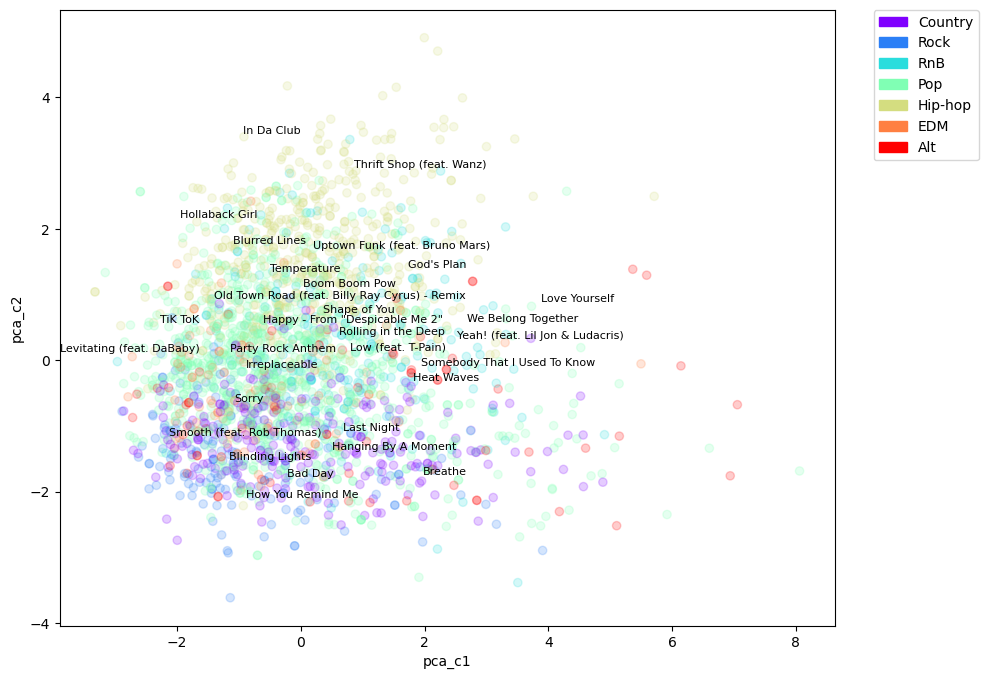

In [75]:
plot_and_annotate("pca_c1", "pca_c2")

PCA: We can see that the data points do seem to overlap with each other over the whole visualization with no clear defined clusters. However, we can see that as we color-code the genres in the graph, similar genres do seem to group together in the same general location. For example, we see a lot of RnB songs at the top, Country songs at the bottom, and Rock songs also at the bottom. For the other 4 genres (Pop, Hip-hop, EDM, Alt), they seem to have more variability, scattered throughout the plot. 

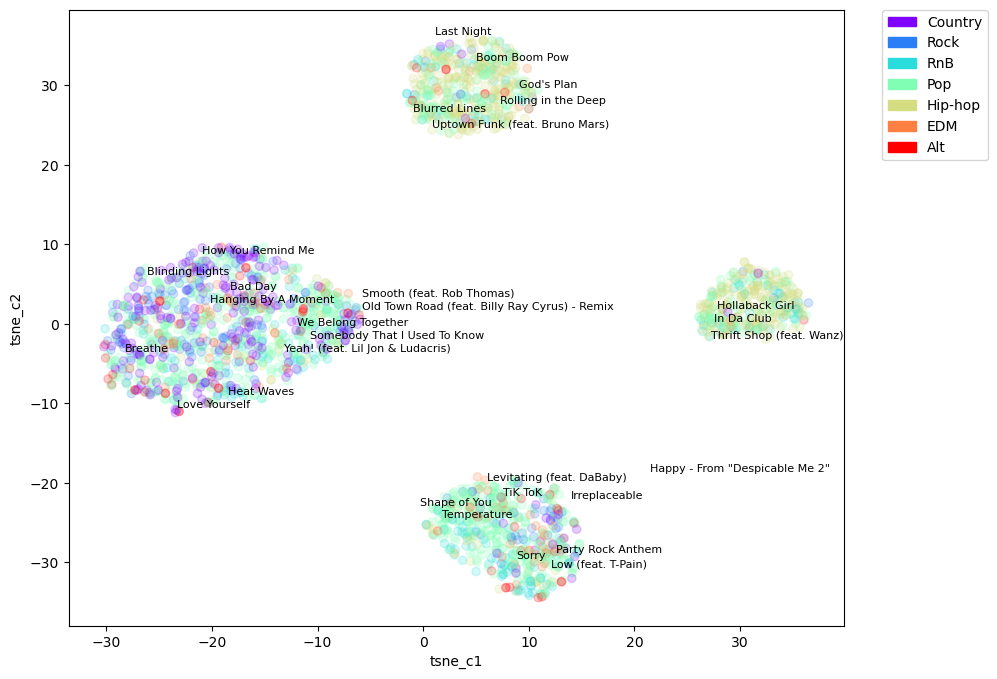

In [76]:
plot_and_annotate("tsne_c1", "tsne_c2")

t-SNE: The clusters don't seem that great at predicting genres outside of country and rock. There are some interesting things to note – Pop and RnB songs have a healthy presence in all four clusters, which really demonstrates their diversity. In addition, it does seem like similar songs in terms of their audio features cluster together. For example, “Perfect”, “See You Again”, and “Love Yourself” (arguably similar in overall "vibe") have around the same values of the principal components, between -60 and -40 for principal component 1 and 10 and 30 for principal component 2. 


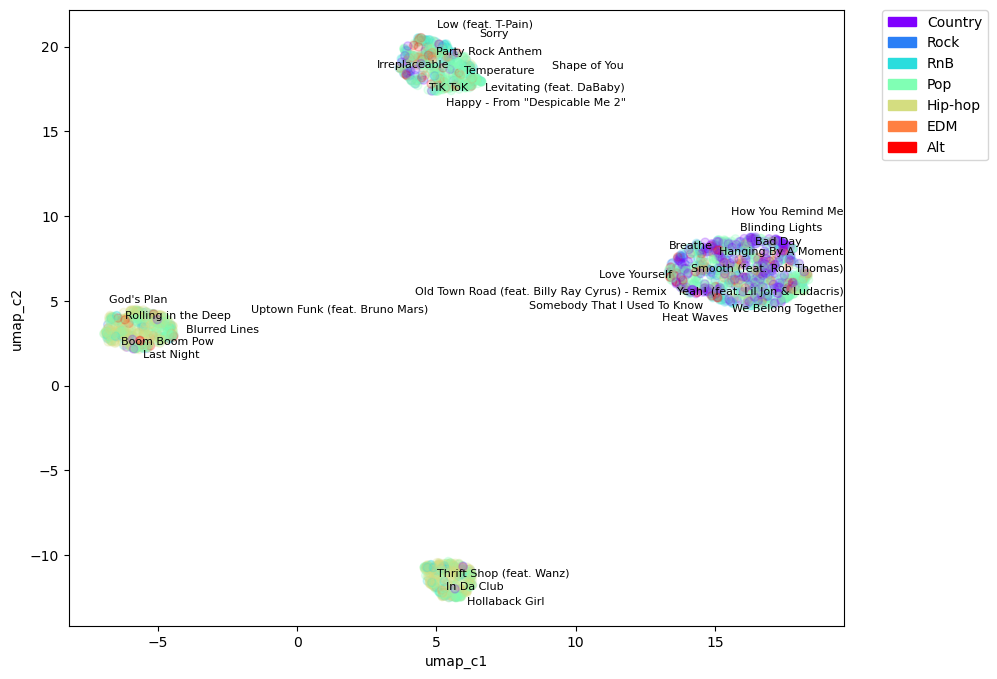

In [77]:
plot_and_annotate("umap_c1", "umap_c2")

UMAP: It seems the genre clustering is pretty similar to t-SNE in that country and rock has a cluster that predicts those two well. Again, Pop and RnB are in every cluster. 

Overall, even though clustering in terms of absolute genres is not very conclusive besides country and rock, similar songs do seem to cluster together, which is interesting to note – especially given that a key part of listening to music involves recommendation algorithms that try to recommend similar music to you. 


# Discussion

## Interpreting the result

There are several key takeaways from these results, some regarding the topic of machine learning, and some regarding the topic of music. The first topic to discuss is the strengths and weaknesses of PCA. As our results indicate, PCA did not reveal any clusters and thus was not useful for separating the data. However, there was still a surprising amount of structure in the PCA plot, which we determined by annotating the genres and song titles of the data points. Ironically, this was much more interpretable and coherent than the corresponding plots for t-SNE and UMAP, which generally did not resemble or relate to real genre labels. We view this paradoxical finding as a reflection that, while t-SNE and UMAP are able to focus on local patterns to reveal clusters, they miss out on a lot of global patterns which might explain these structures more coherently. Conversely, while PCA was surprisingly good at grouping similar songs together, it did not do a good job of separating any potential clusters, as they were probably not linearly separable.

The second topic to discuss is the meaning of the four clusters revealed through t-SNE and UMAP. Firstly, because both methods revealed four obvious clusters at all tested hyperparameter settings, it is reasonable to assume that the four clusters were not a fluke, and likely represent a real grouping pattern of popular music. However, as mentioned before, it’s not clear what any of these clusters represent. Generally, they don’t show any obvious correlations to real genre labels (except Country), and the songs in each cluster don’t immediately seem to be related. However, it is important to note that the audio features can only illustrate a fraction of a song’s subjective quality, as they miss out on crucial information like lyrical content, melody, or voice quality. 

## Limitations

There are some limitations with our work. First, although our dataset is composed of 2,400 songs, this is still a relatively small dataset, so having a larger dataset would definitely generalize our results more. In addition, we are using the most popular songs from each year for the last 2 decades, so expanding the data with songs not as popular could change the result (i.e. we may see more or less variety in each genre). Moreover, it would definitely be good to explore more hyperparameters. For example, for t-SNE we could have experimented with modulating the learning rate, number of iterations, and early exaggeration. For UMAP, we could have explored minimum distance, metric, number of epochs, and the angular distance. These hyperparameters could have made an impact on the results, and would definitely be a good thing to explore in a future project. 




# Ethics & Privacy

Our project acknowledges potential ethical concerns regarding user privacy and bias in our Spotify data analysis. While our data may be influenced by individual listening patterns, it does not include any personally identifying information. In fact, the data that we’re using only includes the information about the 2,400 popular songs from the last 2 decades, which as mentioned in our data section, only includes information about the songs and artists. Thus, there is no personally identifying user data, and just some basic information about the artists and their popular songs – which are already well-known on the internet. Nonetheless, we will make sure to comply with privacy regulations and attend to biases as they come up, in order to prevent any user security and privacy risks including leaking personal user data and listening patterns, as well as leaking personal artist information like detailed metrics about the users listening to their music.

Some possible unintended consequences of our project could be the creation of new song genre labels. For example if pop becomes extremely similar to rock the original genre labels won't fit anymore. Our project would ideally be able to easily highlight these similarities. A journalist could stumble upon our project and come to the conclusion that pop and rock are becoming too similar and maybe attempt to combine the two genres into a new genre such as pop-rock. To address these issues, we will be mindful of what kind music and music trends currently exist and may exist in the future.

One last point we would like to reinforce is that our research is purely descriptive and does not suggest anything about the quality of popular music. We are only interested in observing possible patterns based on a relatively small, convenient sample available to us.

# Conclusion

Overall, we conclude that clustering algorithms are not the best for concretely categorizing a song’s audio features into genres; however, the clustering does lead to some key insights. Importantly, there can be a lot of variety within a particular genre. For instance, we saw that Country and Rock genres clustered together in t-SNE and UMAP, indicated by the higher presence of them in the middle cluster compared to the other genres. Similarly, Hip-hop and RnB demonstrated a significant amount of overlap in all three plots, likely due to the amount of similarity between the genres.

One direct extension of this project would involve examining the four observed clusters to determine what audio features or general qualities are characteristic to each one. For instance, perhaps one cluster could reflect an “angry cluster" (high energy, high loudness, low valence), and another could reflect a “calm cluster” (low energy, high acousticness, high valence). In order to determine this, future research could examine what songs and genres are more particular to each cluster.

In general, we believe our results could support views and research on the growth of music genres. We hope to be able to expand the collection of songs to include those from the rest of the world. This would provide meaningful data on the analysis of songs for the human species as a whole rather than just a specific culture group. We would also want to be able to more accurately predict song genres using song attributes and the lyrics themselves. One way to achieve this in an user-friendly manner is to use deep neural networks such as CNN or RNN. While this project is only a start to music analysis, we hope that it can serve as a stepping stone to more in-depth studies. ROCK ON!


# Footnotes

1. https://developer.spotify.com/documentation/web-api/reference/get-audio-features 
2. https://www.analyticsvidhya.com/blog/2023/03/solving-spotify-multiclass-genre-classification-problem/
3. https://www.kaggle.com/code/danielsheen/spotify-song-genre-classification 
4. https://www.newyorker.com/magazine/2021/03/15/genre-is-disappearing-what-comes-next 
5. https://raw.githubusercontent.com/pandrew99/MindfulML/main/bb_full.csv
6. https://developer.spotify.com/documentation/web-api/reference/get-audio-features